# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [20]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [21]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [22]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [23]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [24]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

workclass         963
occupation        966
native-country    274
dtype: int64


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [25]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
missing_values = df.isnull().sum()
print("Missing value setelah imputasi:")
print(missing_values[missing_values > 0])

Missing value setelah imputasi:
Series([], dtype: int64)


/tmp/ipython-input-2514468378.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [26]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = df[col].unique()
    print(f"Fitur: {col}")
    print(f"Jumlah kategori: {len(unique_vals)}")
    print(f"Kategori: {unique_vals}")
    print()


Fitur: workclass
Jumlah kategori: 9
Kategori: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Fitur: education
Jumlah kategori: 16
Kategori: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Fitur: marital-status
Jumlah kategori: 7
Kategori: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Fitur: occupation
Jumlah kategori: 15
Kategori: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Fitur: relationship
Jumlah kategori: 6
Kategori: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Fitur: race
Jumlah kategori: 5


In [27]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].replace(['?', 'unknown', 'Unknown', 'other', 'Other'], 'Others')
    df[col] = df[col].str.strip().str.replace('.', '', regex=False)
    df[col] = df[col].str.title()

In [28]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = df[col].unique()
    print(f"Fitur: {col}")
    print(f"Jumlah kategori: {len(unique_vals)}")
    print(f"Kategori: {unique_vals}")
    print()


Fitur: workclass
Jumlah kategori: 9
Kategori: ['State-Gov' 'Self-Emp-Not-Inc' 'Private' 'Federal-Gov' 'Local-Gov'
 'Others' 'Self-Emp-Inc' 'Without-Pay' 'Never-Worked']

Fitur: education
Jumlah kategori: 16
Kategori: ['Bachelors' 'Hs-Grad' '11Th' 'Masters' '9Th' 'Some-College' 'Assoc-Acdm'
 'Assoc-Voc' '7Th-8Th' 'Doctorate' 'Prof-School' '5Th-6Th' '10Th'
 '1St-4Th' 'Preschool' '12Th']

Fitur: marital-status
Jumlah kategori: 7
Kategori: ['Never-Married' 'Married-Civ-Spouse' 'Divorced' 'Married-Spouse-Absent'
 'Separated' 'Married-Af-Spouse' 'Widowed']

Fitur: occupation
Jumlah kategori: 15
Kategori: ['Adm-Clerical' 'Exec-Managerial' 'Handlers-Cleaners' 'Prof-Specialty'
 'Other-Service' 'Sales' 'Craft-Repair' 'Transport-Moving'
 'Farming-Fishing' 'Machine-Op-Inspct' 'Tech-Support' 'Others'
 'Protective-Serv' 'Armed-Forces' 'Priv-House-Serv']

Fitur: relationship
Jumlah kategori: 6
Kategori: ['Not-In-Family' 'Husband' 'Wife' 'Own-Child' 'Unmarried' 'Other-Relative']

Fitur: race
Jumlah ka

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

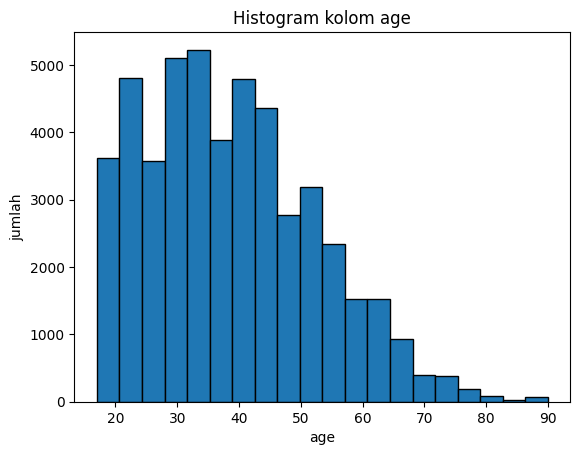

In [ ]:
# Jawab 1.1 - Histrogram
col = 'age'
plt.hist(df[col], bins=20, edgecolor='black')
plt.title(f'Histogram kolom {col}')
plt.xlabel(col)
plt.ylabel('jumlah')
plt.show()

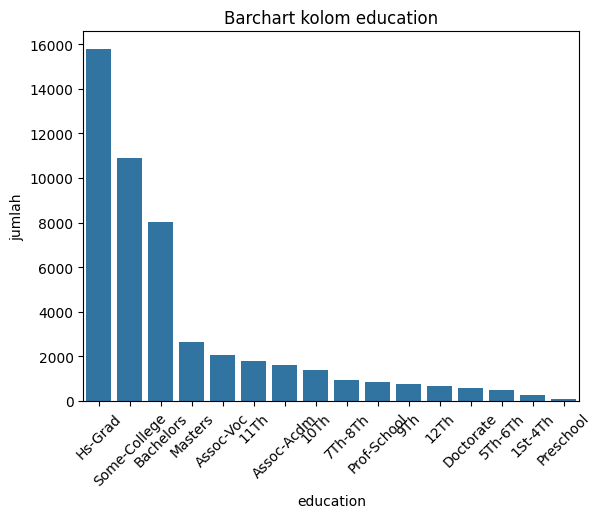

In [ ]:
# Jawab 1.2 - Barchart
col= 'education'
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f'Barchart kolom {col}')
plt.xlabel(col)
plt.ylabel('jumlah')
plt.xticks(rotation=45)
plt.show()

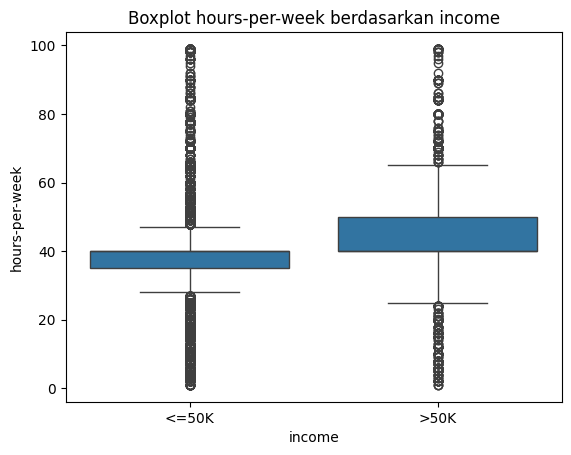

In [29]:
# Jawab 1.3 - Boxplot
col1 = 'income'
col2 = 'hours-per-week'
sns.boxplot(data=df, x=col1, y=col2)
plt.title(f'Boxplot {col2} berdasarkan {col1}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

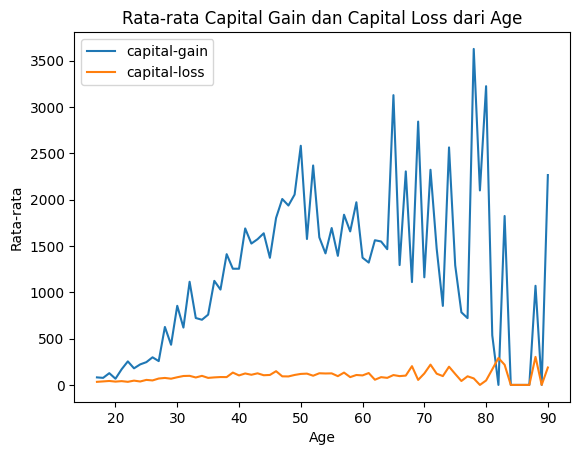

In [30]:
# Jawab 1.4 - Lineplot
col = 'age'
ageCapital = df.groupby(col)[['capital-gain', 'capital-loss']].mean()

ageCapital.plot(kind='line')
plt.title('Rata-rata Capital Gain dan Capital Loss dari Age')
plt.xlabel('Age')
plt.ylabel('Rata-rata')
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [31]:
# Jawab dengan komentar python

'''
  Bisa dengan multiple comment
  seperti ini
'''

'''
1. Distribusi Positif Skewed dimana banyak data terkonsentrasi di sebelah kiri dengan ekor panjang di sebelah kanan.
2. Nilai median, karena outlier tidak banyak terpengaruh sehingga analisis data tetap akurat.
'''

def hitung_outlier(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((col < lower) | (col > upper)).sum()

jumlah_outlier = df.groupby('income')['hours-per-week'].apply(hitung_outlier)
print(jumlah_outlier)

'''
3. <=50K ada 11706 dan >50K ada 781.
Kategori yang paling banyak memiliki outlier adalah <=50K
'''

income
<=50K    11706
>50K       781
Name: hours-per-week, dtype: int64


'\n3. <=50K ada 11706 dan >50K ada 781.\nKategori yang paling banyak memiliki outlier adalah <=50K\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [32]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# Encoding pada kolom 'Sex' dan 'Income'

df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

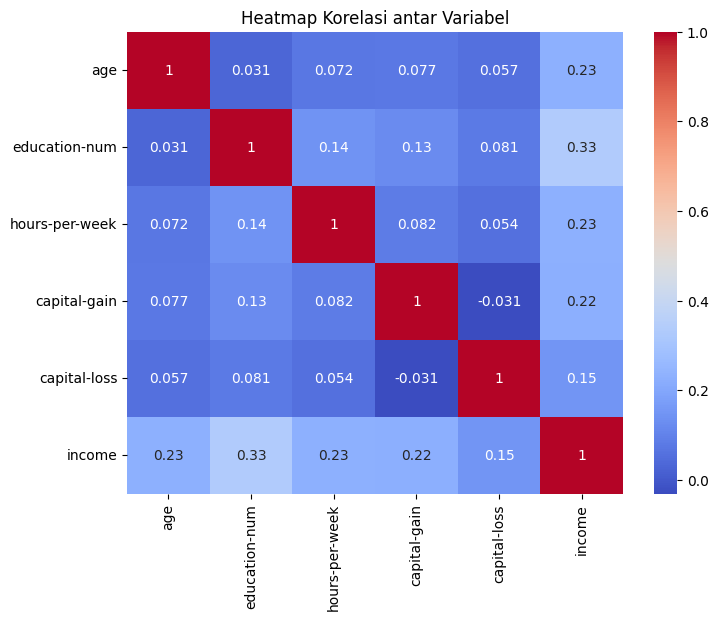

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
kolom_korelasi = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
korelasi = df[kolom_korelasi].corr()
plt.figure(figsize=(8,6))
sns.heatmap(korelasi, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antar Variabel')
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
- age vs education-num: Korelasi sangat kecil (0.03), artinya usia seseorang tidak berhubungan erat dengan tingkat pendidikannya pada data ini.
- age vs hours-per-week: Korelasi kecil (0.07), menunjukkan usia tidak banyak mempengaruhi jam kerja per minggu.
- education-num vs hours-per-week: Korelasi sedang (0.14), orang dengan pendidikan lebih tinggi cenderung memiliki jam kerja sedikit lebih banyak.
- capital-gain vs capital-loss: Korelasi negatif lemah (-0.03), artinya peningkatan capital-gain tidak selalu diikuti penurunan capital-loss, dan sebaliknya.
- education-num memiliki korelasi tertinggi dengan income (0.33), artinya pendidikan adalah faktor paling berpengaruh terhadap pendapatan.
- age, hours-per-week, dan capital-gain juga menunjukkan hubungan positif dengan income (0.22-0.23).
- capital-loss memiliki korelasi positif terendah dengan income (0.15), pengaruhnya lemah.
'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [10]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


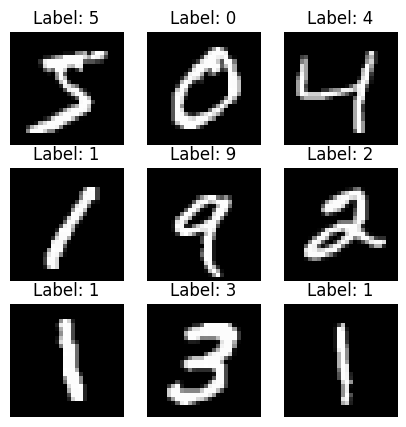

In [11]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

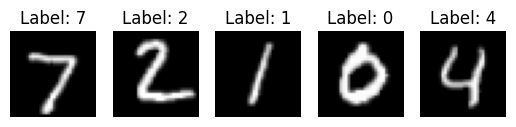

In [12]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
import cv2

# 1. Proses upsampling
X_test_upsampled = np.empty((X_test.shape[0], 32, 32), dtype=np.float32)

for i in range(X_test.shape[0]):
    X_test_upsampled[i] = cv2.resize(X_test[i], (32, 32))

# 2. Tampilkan 5 data hasil proses upsampling
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [13]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_normalized = X_test_upsampled / 255.0

print("Nilai piksel setelah normalisasi:")
print(X_test_normalized)

Nilai piksel setelah normalisasi:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [17]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

print("Shape setelah di-flatten:", X_test_flattened.shape)

Shape setelah di-flatten: (10000, 1024)
